# Проект: Исследование стартапов

Автор - Андрей Подшивалов

## Введение
Для успешной реализации стратегии компании заказчика по входу на инвестиционный рынок необходимо провести глубокий анализ предоставленных заказчиком данных. Исследование направлено на выявление ключевых закономерностей и показателей, которые помогут компании принимать обоснованные инвестиционные решения.

#### Цель проекта:
Провести всесторонний анализ предоставленных заказчиком данных для выявления закономерностей, оценки качества информации и формирования рекомендаций, которые помогут компании принимать взвешенные инвестиционные решения.

#### Задачи проекта:
1. **Подготовка данных**:
   - Сбор и загрузка всех предоставленных датасетов.
   - Проверка названий столбцов и их приведение к единому формату.
   - Анализ типов данных, обработка пропусков и оценка полноты информации.

2. **Предварительная обработка и исследование данных**:
   - Анализ динамики раундов финансирования по годам.
   - Оценка полноты сведений о сотрудниках стартапов в зависимости от размера компаний.
   - Проверка возможности объединения данных по ключевым столбцам.

3. **Работа с проблемными данными**:
   - Приведение структуры проблемных датасетов к удобному для анализа виду.
   - Исследование причин возникновения пропусков и их влияние на результаты анализа.

4. **Исследовательский анализ объединённых таблиц**:
   - Объединение данных для анализа компаний с характеристиками, интересующими заказчика.
   - Выявление типичных значений финансирования и анализ выбросов.
   - Исследование компаний, проданных за ноль или один доллар, с учётом их финансирования.
   - Определение категорий стартапов с высокими ценами покупки и значительным разбросом цен.
   - Анализ количества раундов финансирования перед покупкой стартапа.

5. **Итоговый вывод и рекомендации**:
   - Подведение итогов проведённого анализа.
   - Формулирование выводов и рекомендаций для компании на основе полученных результатов.



## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузим все данные по проекту.
- Проверим названия столбцов.
- Выведем информацию, которая необходима нам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

In [2]:
acq_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
comp_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
edu_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

In [3]:
display(acq_df.info())
display(acq_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


None

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
5,11,227,228,NaN,7140000,2003-08-05
6,12,5,230,cash,0,2007-07-01
7,14,318,314,cash,0,2006-10-01
8,15,20,333,stock,1500000000,2002-07-08
9,16,342,341,cash,350000000,2007-08-01


#### Таблица acquisition
* Стоит заполнить пропуски в столбцах `term_code`, `acquired_at`
* Также надо поменять тип данных в `aquired_at` на datetime64

In [4]:
display(comp_rounds_df.info())
display(comp_rounds_df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

None

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaN,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaN,NaN,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Таблица company_and_rounds
* Cтоит заменить названия столбцов: их надо привести к snake_case. При этом столбец `company  ID` мы назовем `company_id`, а столбец `company  id` его дублирует, при этом имеет пропуски, поэтому целесообразно его переименовать, чтобы не потерять потенциально важные данные;

* Надо заменить пропуски в столбцах `category_code`, `founded_at`, `closed_at`, `domain`, `country_code`;

* Также стоит привести данные к оптимальному типу в столбцах `company_id` (int), `founded_at` (datetime), `closed_at` (datetime), `country_code` (int), `investment_rounds` (int).

In [5]:
display(people_df.info())
display(people_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


None

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN
6,100006,Courtney,Homer,81558.0,jobsbostontech
7,100009,Eddy,Badrina,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette
9,100011,Jeff,Grell,NaN,NaN


#### Таблица people_df:
* Стоит заменить тип данных в столбце `company_id` на int;
* Заполнить пропуски в столбцах `first_name`, `last_name`, `company_id`, `network_username`.

In [6]:
display(edu_df.info())
display(edu_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


None

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN
5,6,1017,Northeastern University,1988-01-01
6,7,6176,Rochester Institute of Technology,2002-01-01
7,8,5412,University of Cambridge,2002-01-01
8,9,1243,University of Oregon,1997-01-01
9,10,6265,University of Pennsylvania,1989-01-01


#### Таблица edu_df:
* Нужно заполнить пропуски в столбце `graduated_at`;
* Заменить тип данных в столбце `graduated_at` на datetime64.

In [7]:
display(degrees_df.info())
display(degrees_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


None

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
5,6,p:1017,BS,Computer Science
6,7,p:6176,BS,Computer Science
7,8,p:5412,MS,Politics
8,9,p:1243,BA,International Business & Marketing
9,10,p:6265,BS,Economics


#### Таблица degrees_df:
* Стоит заполнить пропуски в столбцах `degree_type`, `subject`;
* Типы данных указаны верно.

### 1.2. Смена типов и анализ пропусков

- Обработаем типы данных в столбцах, которые хранят значения даты и времени.

Перед тем, как менять типы данных, для начала нужно заполнить пропуски, чтобы избежать ошибок.

In [8]:
# Заменим пропуски в acq_df условными значениями, которые можно будет отфильтровать при анализе
# В столбце acquired_at заменим их на значение 1970-01-01, являющееся точкой отчета Unix
acq_df['term_code'] = acq_df['term_code'].fillna('unknown')
acq_df['acquired_at'] = acq_df['acquired_at'].fillna('1970-01-01')
# Проверим наличие пропусков после замены
acq_df.isna().sum()

id                      0
acquiring_company_id    0
acquired_company_id     0
term_code               0
price_amount            0
acquired_at             0
dtype: int64

In [9]:
# Теперь приведем столбец acquired_at к типу datetime
acq_df['acquired_at'] = pd.to_datetime(acq_df['acquired_at'])

In [10]:
# Приведем столбцы датафрейма comp_rounds_df к snake_case, перед этим переименовав столбец company  id,
# дублирующий основной столбец
comp_rounds_df['company_id_1'] = comp_rounds_df['company  id']
del comp_rounds_df['company  id']
# Заменим двойные пробелы на нижнее подчеркивание
comp_rounds_df.columns = comp_rounds_df.columns.str.replace('  ', '_')
comp_rounds_df.columns = comp_rounds_df.columns.str.lower()

In [11]:
comp_rounds_df.info()
comp_rounds_df['company_id'].isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  funded_at            52680 non-null   object 
 15  funding_round_typ

302

В данных присутствуют пропуски в столбце company_id. Предполагаю, природа этих пропусков обусловлена тем, что ранее эта таблица состояла из двух разных таблиц, и они были соединены методом `left_join`.

In [12]:
comp_rounds_df = comp_rounds_df.dropna(axis = 0, subset = ['company_id'])

In [13]:
# Теперь заменим пропуски в столбцах на условные значения, которые можно будет отфильтровать
comp_rounds_df['category_code'] = comp_rounds_df['category_code'].fillna('unknown')
comp_rounds_df['founded_at'] = comp_rounds_df['founded_at'].fillna('1970-01-01')
comp_rounds_df['closed_at'] = comp_rounds_df['closed_at'].fillna('1970-01-01')
comp_rounds_df['domain'] = comp_rounds_df['domain'].fillna('unknown')
comp_rounds_df['network_username'] = comp_rounds_df['network_username'].fillna('unknown')
comp_rounds_df['country_code'] = comp_rounds_df['country_code'].fillna('unknown')

In [14]:
# Поменяем типы данных столбцов на оптимальные
comp_rounds_df['company_id'] = comp_rounds_df['company_id'].astype('int')
comp_rounds_df['founded_at'] = pd.to_datetime(comp_rounds_df['founded_at'])
comp_rounds_df['closed_at'] = pd.to_datetime(comp_rounds_df['closed_at'])
comp_rounds_df['investment_rounds'] = comp_rounds_df['investment_rounds'].astype('int')
comp_rounds_df['funded_at'] = pd.to_datetime(comp_rounds_df['funded_at'])

In [15]:
comp_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  int32         
 1   name                 217472 non-null  object        
 2   category_code        217472 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           217472 non-null  datetime64[ns]
 5   closed_at            217472 non-null  datetime64[ns]
 6   domain               217472 non-null  object        
 7   network_username     217472 non-null  object        
 8   country_code         217472 non-null  object        
 9   investment_rounds    217472 non-null  int32         
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [16]:
# Заполним пропуски в столбцах first_name, last_name, network_username таблицы people_df
people_df['first_name'] = people_df['first_name'].fillna('unknown')
people_df['last_name'] = people_df['last_name'].fillna('unknown')
people_df['network_username'] = people_df['network_username'].fillna('unknown')

In [17]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226709 non-null  object 
 2   last_name         226709 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  226709 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [18]:
# Заполним пропуски в столбце graduated_at
edu_df['graduated_at'] = edu_df['graduated_at'].fillna('1970-01-01')

In [19]:
# Поменяем тип столбца graduated_at на datetime
edu_df['graduated_at'] = pd.to_datetime(edu_df['graduated_at'])

In [20]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  109610 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [21]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [22]:
# Заполним пропуски в столбцах degree_type, subject
degrees_df['degree_type'] = degrees_df['degree_type'].fillna('unknown')
degrees_df['subject'] = degrees_df['subject'].fillna('unknown')

In [23]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  109610 non-null  object
 3   subject      109610 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


#### Промежуточный вывод:
* Данные очищены от пропусков, типы данных преобразованы, и датасеты подготовлены к анализу;
* Для выполнения задач проекта данных потенциально хватает.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

- Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

In [24]:
# Выделим из даты финансирования год
comp_rounds_df['funded_year'] = comp_rounds_df['funded_at'].dt.year
# Создадим сводную таблицу, предварительно отфильтровав условные значения, которыми мы заменяли пропуски
pivot = comp_rounds_df[(comp_rounds_df['funded_at'] != '1970-01-01') 
                       & (comp_rounds_df['funding_rounds'] != -1)
                       & (comp_rounds_df['raised_amount'] != -1)].pivot_table(
    values = ['raised_amount', 'funding_rounds'], index = 'funded_year', 
    aggfunc = {'raised_amount' : 'median', 'funding_rounds': 'sum'})
pivot['raised_amount'] = round(pivot['raised_amount'], 2)
# Отфильтруем года, где менее 50 раундов финансирования
pivot = pivot[pivot['funding_rounds'] > 50]
display(pivot)

,funding_rounds,raised_amount
funded_year,,
1998.0,72.0,100000.0
1999.0,268.0,2000000.0
2000.0,403.0,4200000.0
2001.0,302.0,3000000.0
2002.0,385.0,4200000.0
2003.0,569.0,3000000.0
2004.0,1057.0,5000000.0
2005.0,4157.0,5500000.0
2006.0,6295.0,5000000.0


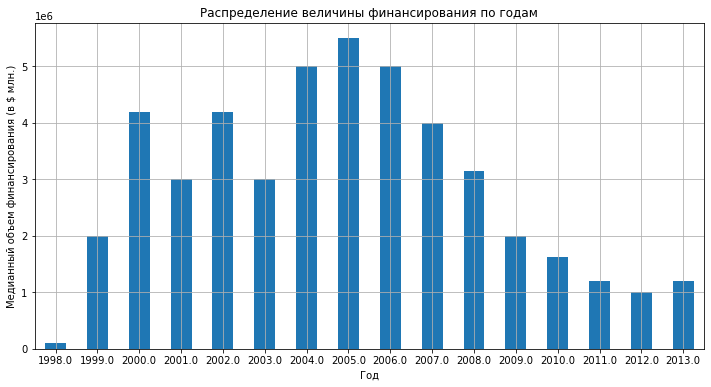

In [25]:
plt.figure(figsize=(12, 6))

pivot['raised_amount'].plot(
               kind='bar', 
               rot=0, 
               legend=False,
               title='Распределение величины финансирования по годам')
plt.xlabel('Год')
plt.ylabel('Медианный объем финансирования (в $ млн.)')
plt.grid()

plt.show()

#### Промежуточный вывод:
* Наибольшая сумма финансирования за год составляет **5500000** в 2005 году, при этом раундов в году выделяется **4157**;
* 2013 год выделяется на фоне остальных по количеству раундов финансирования: тенденция с 1998 г. показывает, что с каждым годом кол-во раундов постепенно растет, а 2013 год впервые за весь период имеет показатель, хоть и незначительно, но ниже предшественника: кол-во раундов снизилось с **24549** в 2012 году до **23978** в 2013 году.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп.
- Проверим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [26]:
degrees_edu_df = edu_df.merge(degrees_df, on = 'id', how = 'inner')
degrees_edu_df.head(10)

,id,person_id,instituition,graduated_at,object_id,degree_type,subject
0,1,6117,NaN,1970-01-01,p:6117,MBA,unknown
1,2,6136,"Washington University, St. Louis",1990-01-01,p:6136,BA,"English, French"
2,3,6136,Boston University,1992-01-01,p:6136,MS,Mass Communication
3,4,6005,University of Greenwich,2006-01-01,p:6005,MS,Internet Technology
4,5,5832,Rice University,1970-01-01,p:5832,BCS,"Computer Science, Psychology"
5,6,1017,Northeastern University,1988-01-01,p:1017,BS,Computer Science
6,7,6176,Rochester Institute of Technology,2002-01-01,p:6176,BS,Computer Science
7,8,5412,University of Cambridge,2002-01-01,p:5412,MS,Politics
8,9,1243,University of Oregon,1997-01-01,p:1243,BA,International Business & Marketing
9,10,6265,University of Pennsylvania,1989-01-01,p:6265,BS,Economics


In [27]:
# Сделаем столбец, с True или False в зависимости от отсутствия информации об образования
degrees_edu_df['no_edu'] = (pd.isna(degrees_edu_df['instituition']) | 
                            (degrees_edu_df['degree_type'] == 'unknown') |
                            (degrees_edu_df['subject'] == 'unknown'))

In [28]:
# Посчитаем кол-во сотрудников в компаниях
people_in_comp = people_df.groupby('company_id')['id'].nunique()
people_df['people_in_comp'] = pd.Series(people_in_comp)
# Напишем цикл, который проставит категории компаний
comp_type = []
for i in people_df['people_in_comp']:
    if i == 1:
        comp_type.append('Бизнес из 1 человека')
    elif 1 < i <= 10:
        comp_type.append('Микропредприятие')
    elif 11 <= i <= 30:
        comp_type.append('Малый бизнес')
    elif 31 <= i <= 100:
        comp_type.append('Средний бизнес')
    elif i > 100:
        comp_type.append('Крупный бизнес')
    else:
        comp_type.append('Нет информации')
people_df['comp_type'] = pd.Series(comp_type)

In [29]:
# Смёрджим датафреймы
peop_edu_df = pd.merge(people_df, degrees_edu_df, left_on = 'id', right_on = 'person_id', how = 'inner')
peop_edu_df.info()
peop_edu_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109056 entries, 0 to 109055
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              109056 non-null  int64         
 1   first_name        109056 non-null  object        
 2   last_name         109056 non-null  object        
 3   company_id        28638 non-null   float64       
 4   network_username  109056 non-null  object        
 5   people_in_comp    8643 non-null    float64       
 6   comp_type         109056 non-null  object        
 7   id_y              109056 non-null  int64         
 8   person_id         109056 non-null  int64         
 9   instituition      109002 non-null  object        
 10  graduated_at      109056 non-null  datetime64[ns]
 11  object_id         109056 non-null  object        
 12  degree_type       109056 non-null  object        
 13  subject           109056 non-null  object        
 14  no_e

,id_x,first_name,last_name,company_id,network_username,people_in_comp,comp_type,id_y,person_id,instituition,graduated_at,object_id,degree_type,subject,no_edu
0,10,Mark,Zuckerberg,5.0,unknown,NaN,Нет информации,2415,10,Harvard University,1970-01-01,p:10,unknown,Computer Science,True
1,100006,Courtney,Homer,81558.0,jobsbostontech,NaN,Нет информации,83604,100006,MIT Sloan School of Management,2004-01-01,p:100006,MBA,Strategy & Marketing,False
2,100013,Umesh,Singh,NaN,unknown,5.0,Микропредприятие,36786,100013,Rutgers University,1970-01-01,p:100013,MBA,Finance,False
3,100013,Umesh,Singh,NaN,unknown,5.0,Микропредприятие,36787,100013,University of Mumbai,1970-01-01,p:100013,MS,Physical Chemistry,False
4,100018,Adam,Beckerman,148554.0,adam_beckerman,3.0,Микропредприятие,14433,100018,"Columbia University, Business School",2004-01-01,p:100018,MBA,"Entrepreneurship, Marketing",False
5,100018,Adam,Beckerman,148554.0,adam_beckerman,3.0,Микропредприятие,14434,100018,"University of Maryland, College Park",1996-01-01,p:100018,BS,"Marketing, French",False
6,100031,Sandeep,Hegde,81576.0,sandeephegde,3.0,Микропредприятие,14436,100031,Gogte Institute of Technology,2010-01-01,p:100031,BS,Information Science & Engineering,False
7,100036,Angela,Chu,NaN,unknown,8.0,Микропредприятие,14437,100036,Qingdao University of Science & Technology,2010-01-01,p:100036,BS,pharmaceutical,False
8,100045,Sebastian,Toke-Nichols,NaN,sebastian686,NaN,Нет информации,14439,100045,"Imperial College, London",1982-01-01,p:100045,BS,Engineering,False
9,100049,Mike,Cannady,63.0,unknown,5.0,Микропредприятие,32494,100049,New York University (NYU),1970-01-01,p:100049,MBA,"Entertainment, Media & Technology and Corporat...",False


In [30]:
round(peop_edu_df[peop_edu_df['comp_type'] != 'Нет информации'].groupby('comp_type')['no_edu'].sum()/
      peop_edu_df[peop_edu_df['comp_type'] != 'Нет информации'].groupby('comp_type')['people_in_comp'].sum(), 3)

comp_type
Бизнес из 1 человека    0.295
Крупный бизнес          0.000
Малый бизнес            0.015
Микропредприятие        0.094
Средний бизнес          0.010
dtype: float64

#### Промежуточный вывод:
* Судя по долям, в районе 30% `Бизнесов из 1 человека` не имеют информации об образовании в данных, также в районе 1% сотрудников `Микропредприятий` и `Среднего бизнеса`;
* В `Малом бизнесе` доля сотрудников без информации об образовании ближе к 2%.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Посмотрим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец `network_username` присутствует в двух датасетах people_df и comp_rounds_df. Проверим, подходят ли они для мёрджинга.

In [31]:
unique_people = set(people_df['network_username'])
unique_comp_rounds = set(comp_rounds_df['network_username'])

In [32]:
match = unique_people.intersection(unique_comp_rounds)
display(f'Количество совпадающих уникальных ников: {len(match)}')
display(f'Процент совпадающих ников от уникальных в people_df: {round(len(match)/len(unique_people), 2)}')
display(f'Процент совпадающих ников от уникальных в comp_rounds_df: {round(len(match)/len(unique_comp_rounds), 2)}')

'Количество совпадающих уникальных ников: 2200'

'Процент совпадающих ников от уникальных в people_df: 0.06'

'Процент совпадающих ников от уникальных в comp_rounds_df: 0.03'

Столбец не подходит для объединения датафреймов, так как количество совпадающих строк имеет незначительную долю относительно кол-ва уникальных строк `network_username` в обоих датасетах, и результат может быть некорректным из-за количества пропусков.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Приведем данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

In [33]:
comp_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  int32         
 1   name                 217472 non-null  object        
 2   category_code        217472 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           217472 non-null  datetime64[ns]
 5   closed_at            217472 non-null  datetime64[ns]
 6   domain               217472 non-null  object        
 7   network_username     217472 non-null  object        
 8   country_code         217472 non-null  object        
 9   investment_rounds    217472 non-null  int32         
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

Ранее мы не заполнили пропуски в столбцах с 13 по 21 именно потому, что предположили, что company_and_rounds - это две соединенные таблицы: company и rounds. Вероятно, этим и вызвано такое количество пропусков во второй таблице: она была присоединена с помощью `pd.merge(how = left)`. Попробуем их разъединить на две таблицы.

In [34]:
company_df = comp_rounds_df.iloc[:, 0:13]

In [35]:
rounds_df = comp_rounds_df.iloc[:, 13:23]

In [36]:
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52626 non-null  float64       
 1   funded_at            52382 non-null  datetime64[ns]
 2   funding_round_type   52626 non-null  object        
 3   raised_amount        52626 non-null  float64       
 4   pre_money_valuation  52626 non-null  float64       
 5   participants         52626 non-null  float64       
 6   is_first_round       52626 non-null  float64       
 7   is_last_round        52626 non-null  float64       
 8   company_id_1         52626 non-null  float64       
 9   funded_year          52382 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 18.3+ MB


In [37]:
# Удалим пустые значения
rounds_df = rounds_df.dropna()
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52382 entries, 0 to 217471
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52382 non-null  float64       
 1   funded_at            52382 non-null  datetime64[ns]
 2   funding_round_type   52382 non-null  object        
 3   raised_amount        52382 non-null  float64       
 4   pre_money_valuation  52382 non-null  float64       
 5   participants         52382 non-null  float64       
 6   is_first_round       52382 non-null  float64       
 7   is_last_round        52382 non-null  float64       
 8   company_id_1         52382 non-null  float64       
 9   funded_year          52382 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.4+ MB



## Шаг 3. Исследовательский анализ объединённых таблиц


### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

In [38]:
filtered = comp_rounds_df[((comp_rounds_df['funding_rounds'] > 0) | (comp_rounds_df['investment_rounds'] > 0)) 
                          | (comp_rounds_df['status'] == 'acquired')]

In [39]:
filtered['company_id'].nunique

<bound method IndexOpsMixin.nunique of 0             1
1             1
2             1
3            10
4           100
          ...  
217466     3429
217467     7748
217469    43233
217470    43233
217471    43233
Name: company_id, Length: 61666, dtype: int32>

In [40]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61666 entries, 0 to 217471
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           61666 non-null  int32         
 1   name                 61666 non-null  object        
 2   category_code        61666 non-null  object        
 3   status               61666 non-null  object        
 4   founded_at           61666 non-null  datetime64[ns]
 5   closed_at            61666 non-null  datetime64[ns]
 6   domain               61666 non-null  object        
 7   network_username     61666 non-null  object        
 8   country_code         61666 non-null  object        
 9   investment_rounds    61666 non-null  int32         
 10  funding_rounds       61666 non-null  float64       
 11  funding_total        61666 non-null  float64       
 12  milestones           61666 non-null  float64       
 13  funding_round_id     52626 non

In [41]:
# Поменяем тип столбца funding_rounds для дальнейших вычислений
filtered['funding_rounds'] = filtered['funding_rounds'].astype('int')

C:\Users\A4F7~1\AppData\Local\Temp/ipykernel_12584/1211489907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['funding_rounds'] = filtered['funding_rounds'].astype('int')



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` проверим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

In [42]:
# Попробуем применить .describe()
desc = filtered['funding_total'][filtered['funding_total'] != 0].describe()
desc

count    4.841300e+04
mean     2.693499e+07
std      1.009526e+08
min      2.910000e+02
25%      1.060680e+06
50%      5.900000e+06
75%      2.353220e+07
max      5.700000e+09
Name: funding_total, dtype: float64

In [43]:
# Попробуем отформатировать получившиеся значения
desc_norm = desc.apply(lambda desc: f'{desc:.0f}')
desc_norm

count         48413
mean       26934990
std       100952556
min             291
25%         1060680
50%         5900000
75%        23532200
max      5700000000
Name: funding_total, dtype: object

Так как в данных присутствуют значительные выбросы, и максимальное значение финансирования составляет аж 5700000000, типичным можно считать значения в диапазоне от 1060680 (1 квартиль) до 23532200 (3 квартиль). Медианное значение составляет 5900000.

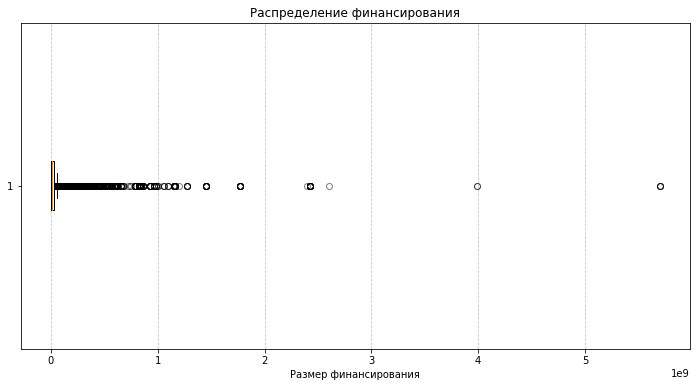

In [44]:
plt.figure(figsize=(12, 6))
plt.boxplot(filtered['funding_total'][filtered['funding_total'] != 0], vert=False,
            flierprops=dict(marker='o', color='red', alpha=0.5))

plt.title('Распределение финансирования')
plt.xlabel('Размер финансирования')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

К имеющимся данным неприменимымы стандартные способы нахождения типичных значений, так как выбросы занимают большую долю от графика, и "тело" боксплота сильно сужается. Попробуем отфильтровать значения по 25-75 процентилям.

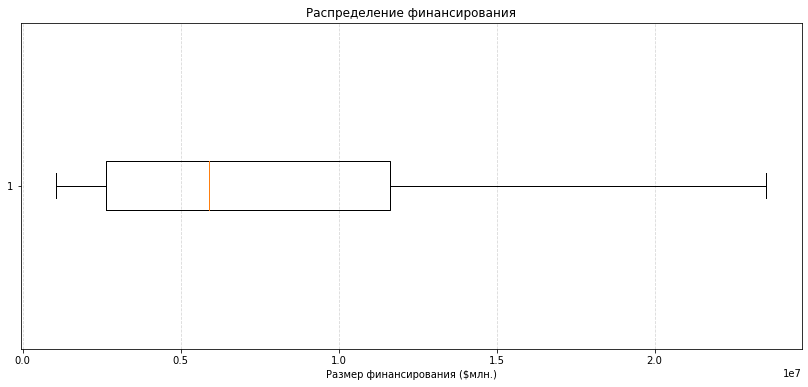

In [45]:
low = filtered['funding_total'][filtered['funding_total'] != 0].quantile(0.25)
high = filtered['funding_total'][filtered['funding_total'] != 0].quantile(0.75)


plt.figure(figsize=(14, 6))
plt.boxplot(round(filtered['funding_total'][(filtered['funding_total'] >= low) & (filtered['funding_total'] <= high)], 2), vert=False)

plt.title('Распределение финансирования')
plt.xlabel('Размер финансирования ($млн.)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

Теперь, на нормализованных данных, график boxplot читаем. Медиана находится практически в районе 0,6 млн. долларов. Правый "ус" графика находится в районе 2,3 млн.


### 3.3. Куплены забесплатно?

- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

In [46]:
sold = filtered.merge(acq_df, left_on = 'company_id', right_on = 'acquired_company_id', how = 'inner')
sold_free = sold[((sold['price_amount'] == 0) | (sold['price_amount'] == 1)) & (sold['funding_total'] != 0)]
sold_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3059 entries, 7 to 11730
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            3059 non-null   int32         
 1   name                  3059 non-null   object        
 2   category_code         3059 non-null   object        
 3   status                3059 non-null   object        
 4   founded_at            3059 non-null   datetime64[ns]
 5   closed_at             3059 non-null   datetime64[ns]
 6   domain                3059 non-null   object        
 7   network_username      3059 non-null   object        
 8   country_code          3059 non-null   object        
 9   investment_rounds     3059 non-null   int32         
 10  funding_rounds        3059 non-null   int32         
 11  funding_total         3059 non-null   float64       
 12  milestones            3059 non-null   float64       
 13  funding_round_id 

In [47]:
sold_free.head(10)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,is_first_round,is_last_round,company_id_1,funded_year,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
7,10054,Jumptap,mobile,acquired,2005-01-01,1970-01-01,jumptap.com,jumptap,USA,0,...,0.0,0.0,10054.0,2008.0,9288,23283,10054,cash_and_stock,0,2013-08-13
8,10054,Jumptap,mobile,acquired,2005-01-01,1970-01-01,jumptap.com,jumptap,USA,0,...,0.0,1.0,10054.0,2005.0,9288,23283,10054,cash_and_stock,0,2013-08-13
9,10054,Jumptap,mobile,acquired,2005-01-01,1970-01-01,jumptap.com,jumptap,USA,0,...,0.0,0.0,10054.0,2005.0,9288,23283,10054,cash_and_stock,0,2013-08-13
10,10054,Jumptap,mobile,acquired,2005-01-01,1970-01-01,jumptap.com,jumptap,USA,0,...,0.0,0.0,10054.0,2006.0,9288,23283,10054,cash_and_stock,0,2013-08-13
11,10054,Jumptap,mobile,acquired,2005-01-01,1970-01-01,jumptap.com,jumptap,USA,0,...,0.0,0.0,10054.0,2011.0,9288,23283,10054,cash_and_stock,0,2013-08-13
12,10054,Jumptap,mobile,acquired,2005-01-01,1970-01-01,jumptap.com,jumptap,USA,0,...,0.0,0.0,10054.0,2011.0,9288,23283,10054,cash_and_stock,0,2013-08-13
13,10054,Jumptap,mobile,acquired,2005-01-01,1970-01-01,jumptap.com,jumptap,USA,0,...,1.0,0.0,10054.0,2012.0,9288,23283,10054,cash_and_stock,0,2013-08-13
23,101312,SideTour,web,acquired,2011-06-01,1970-01-01,sidetour.com,sidetour,USA,0,...,0.0,0.0,101312.0,2011.0,9653,11391,101312,unknown,0,2013-09-18
24,101312,SideTour,web,acquired,2011-06-01,1970-01-01,sidetour.com,sidetour,USA,0,...,1.0,0.0,101312.0,2013.0,9653,11391,101312,unknown,0,2013-09-18
25,101312,SideTour,web,acquired,2011-06-01,1970-01-01,sidetour.com,sidetour,USA,0,...,0.0,1.0,101312.0,2011.0,9653,11391,101312,unknown,0,2013-09-18


In [48]:
display('Верхняя граница выбросов (100-й процентиль):')
sold_free[sold_free['funding_total'].quantile(0.99) < sold_free['funding_total']]['funding_total'].apply(lambda desc: f'{desc:.0f}')

'Верхняя граница выбросов (100-й процентиль):'

674      5700000000
675      5700000000
676      5700000000
677      5700000000
2356      265744000
2357      265744000
2358      265744000
2359      265744000
2360      265744000
2361      265744000
4013      253000000
4014      253000000
4015      253000000
4016      253000000
6640      265000000
6641      265000000
6805      318000000
6806      318000000
6809      299500000
6810      299500000
6811      299500000
6812      299500000
6813      299500000
7110      260000000
10425     395000000
10426     395000000
10427     395000000
10428     395000000
11364     314960000
Name: funding_total, dtype: object

In [49]:
display('Нижняя граница выбросов (0-й процентиль): ')
sold_free[sold_free['funding_total'] < (sold_free['funding_total'].quantile(0.01))]['funding_total'].sort_values()

'Нижняя граница выбросов (0-й процентиль): '

7707      3750.0
6207      4000.0
3059     10000.0
3898     10000.0
8527     12000.0
8526     12000.0
8348     12000.0
7776     12000.0
7638     15000.0
8785     15000.0
3462     15000.0
1920     16000.0
5590     18000.0
11451    18885.0
5891     20000.0
5797     20000.0
5796     20000.0
8531     20000.0
1503     20000.0
9824     20000.0
9825     20000.0
10785    20000.0
161      20000.0
2384     25000.0
9399     31490.0
2714     33000.0
11163    38881.0
10593    48601.0
Name: funding_total, dtype: float64

Нулевому процентилю соответствует нижняя граница инвестиций в объеме от $3750 до $3750. Верхняя граница (100-й процентиль) составляет инвестиции в стартапы общим объемом от $314960000 до $5700000000. 


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов стоит выделить категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.


In [50]:
filtered.groupby('category_code')['funding_total'].agg('median').sort_values(ascending=False).head()

category_code
nanotech         25000000.0
semiconductor    19930200.0
cleantech        15000000.0
medical          15000000.0
biotech          10127100.0
Name: funding_total, dtype: float64

В топ категорий стартапов по типично высоким ценам релевантно выбрать именно первые 5 компаний, так как типичные значения по инвестициям в них составляют более 10 млн. долларов США.  
Теперь попробуем найти стартапы с наибольшим разбросом цен через разницу 75 и 25 процентилей.

In [51]:
# Посчитаем стартапы с наибольшим разбросом цен через разницу 3-го и 2-го квартилей
q25 = filtered.groupby('category_code')['funding_total'].quantile(0.25)
q75 = filtered.groupby('category_code')['funding_total'].quantile(0.75)

iqr = (q75 - q25).sort_values(ascending=False)
iqr.head()


category_code
nanotech         72592020.0
cleantech        55025000.0
semiconductor    42551500.0
medical          40484800.0
biotech          37179932.5
Name: funding_total, dtype: float64

Компаний с самым большим разбросом цен совпадают с компаниями с типично высокими ценами, но обратим внимание на 2 и 3-е места.  
Тут стоит отметить, что категория `cleantech` имеет больший разброс цен, хоть компании, входящие в категорию `semiconductor` и типично дороже.


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуем значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

In [52]:
status_rounds = filtered.groupby('status')['funding_rounds'].agg('median')

<AxesSubplot:title={'center':'Медианное количество раундов финансирования компаний по группам'}, xlabel='Тип компании', ylabel='Количество раундов финансирования'>

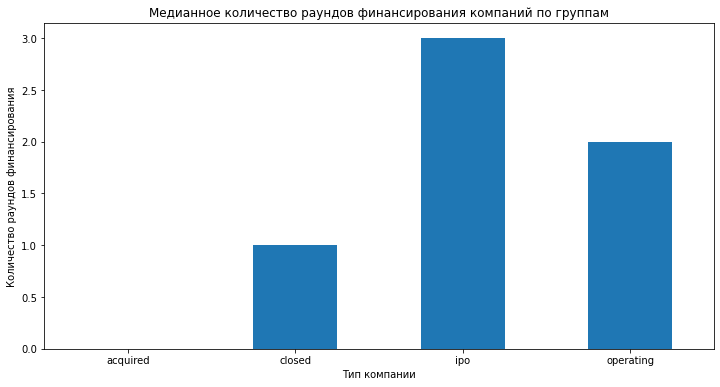

In [53]:
status_rounds.plot(kind = 'bar',
               title = f'Медианное количество раундов финансирования компаний по группам',
               legend = False,
               ylabel = 'Количество раундов финансирования',
               xlabel = 'Тип компании',
               rot=0,
               figsize = (12, 6))

* Судя по графику распределения, в среднем закрытые (`closed`) компании проходят один раунд финансирования; 
* Компании, входящие в категорию `operating`, проходят финансирование из двух раундов; 
* Для компаний, выходящих на `ipo`, типично 3 раунда финансирования, таким образом, они лидируют;
* Компании же, которые были куплены (категория `acquired`), в среднем не проходят ни одного раунда финансирования.


## Шаг 4. Итоговый вывод и рекомендации


#### Краткий обзор проделанной работы:
* Типы данных были преобразованы к релевантным;
* Заменены пропуски;
* Проведен анализ динамики раундов финансирования по годам;
* Была оценена полноты сведений об образовании сотрудников в зависимости от размера компаний;
* Датасет `companies_and_rounds` приведен к удобному для анализа виду;
* Были отфильтрованы данные для анализа компаний с характеристиками, интересующими заказчика;
* Проведен анализ типичных значений финансирования и выбросов;
* Исследованы компании, проданные за ноль или один доллар, с учётом объемов их финансирования;
* Определены категории стартапов с высокими ценами покупки и большим разбросом цен;
* Анализ количества раундов финансирования перед покупкой стартапа;  

#### Основные выводы:
* Количество раундов и объемов финансирования стартапов разнится по годам: больше всего раундов выходит на 2012 год, где их кол-во составляет 24549, по объемам финансирования лидирует 2005 год с общим объемом в $5.500.000;  
* 30% `Бизнесов из 1 человека` не имеют информации об образовании сотрудников, 1% работников `Микропредприятий` и `Среднего бизнеса`, а в `Малом бизнесе` доля сотрудников без информации об образовании ближе к 2%;
* Типичные объемы, так называемое "тело", составляют инвестиции в общем объеме от $1.060.680 до $23.532.200. Минимальный объем инвестиций составляет $291,   
а максимальный - $5.700.000.000;
* В данных по компаниям, купленным за 0 или 1 доллар, нижняя граница инвестиций находится в объеме от $3750 до $48601. Верхняя граница составляет инвестиции в стартапы общим объемом от $314960000 до $5700000000;
* Компаний с самым большим разбросом цен совпадают с компаниями с типично высокими ценами. В них входят категории `nanotech`, `semiconductor`, `cleantech`, `medical`, `biotech`. Однако категория `cleantech` имеет больший разброс цен, хоть компании, входящие в категорию `semiconductor` и типично дороже.
* Судя по графику распределения, в среднем закрытые (`closed`) компании проходят один раунд финансирования. Компании `operating` зачастую выдерживают 2 раунда;  А для компаний, выходящих на `ipo`, типично 3 раунда финансирования;  

#### Рекомендации для заказчика:
* Стоит принять во внимание, что категории `nanotech`, `semiconductor`, `cleantech` показывают высокий разброс цен, но при этом `semiconductor` стабильно дороже, а `cleantech` - волатильнее;
* Также потенциально рисковаными являются бизнесы из одного человека, так как в них в среднем до 30% сотрудников без данных об образовании;
* Cтоит избегать стартапов с покупкой за $0/$1 дешевле $48601, так как данные бизнесы находятся в пределах нижней границы, что может сигнализировать о негативном состоянии компании;
* Важно иметь в виду, что для IPO-стартапов целесообразнее распределять инвестиции на 3 этапа, фокусируясь на секторах с типичным чеком $23.5 млн;